## Problem Statement

* Datasets provide fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 
* Predict the Co2emission for given fuel consumption ratings CYLINDERS,ENGINESIZE, FUELCONSUMPTION_COMB.

### Import the required modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the data from the dataset

In [2]:
df = pd.read_csv("Co2Conum.csv")
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


### EDA

In [3]:
df.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_COMB  1067 non-null   float64
 3   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 33.5 KB


In [5]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


In [6]:
df.isna().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

In [7]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


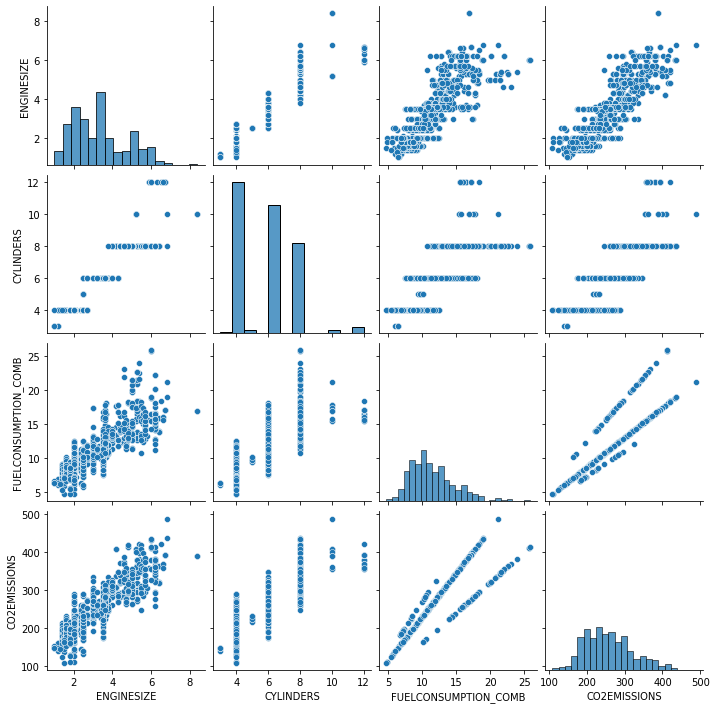

In [8]:
sns.pairplot(df)

### Cleanse the data if required

In [9]:
### Decide dependent and independent variables

# Dependent Variable --> CO2EMISSIONS
# Independent Variables --> ENGINESIZE, CYLINDERS, FUELCONSUMPTION_COMB

In [10]:
x = df.drop(['CO2EMISSIONS'], axis= 1)
y = df['CO2EMISSIONS']

### Split the test_train_data

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.8, shuffle = True, random_state= 123)

### Create and Train the Model

In [12]:
from sklearn.linear_model import LinearRegression

# Create Model
model = LinearRegression()

# Train the model
model.fit(x, y)

LinearRegression()

### Model Evaluation

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# prediction
y_predict = model.predict(x_test)

# mean absolute error
mae = mean_absolute_error(y_test, y_predict)
print(f"Mean absolute error = {mae}")

# mean squared error
mse = mean_squared_error(y_test, y_predict)
print(f"Mean squared error = {mse}")

# Root mean squared error
rmse = np.sqrt(mse)
print(f"Root mean squared error = {rmse}")

# R2- score
r2 = r2_score(y_test, y_predict)
print(f"R2- score = {r2}")

# Adjusted R2- score
# n--> size of result
n= y_test.size
# k--> no. of independent variables
k = 3

adjusted_r2 = (1 - ((1 - r2) * ((n - 1) / (n - (k + 1)))))
print(f"Adjusted R2- score= {adjusted_r2}")


Mean absolute error = 18.41367570827188
Mean squared error = 653.8450232130659
Root mean squared error = 25.570393489601717
R2- score = 0.8253159959225219
Adjusted R2- score= 0.8228205101499866


### predict the Co2emission where  the ENGINESIZE is 2.0, CYLINDERS is 4, FUELCONSUMPTION_COMB is 8 

In [14]:
y_prediction = model.predict([[2.0, 4, 8]])
print(f"Co2emission where the ENGINESIZE is 2.0, CYLINDERS is 4, FUELCONSUMPTION_COMB is 8 = {y_prediction}")

Co2emission where the ENGINESIZE is 2.0, CYLINDERS is 4, FUELCONSUMPTION_COMB is 8 = [193.7637179]


C:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
import pickle
with open("./Co2_emission_model.pkl", "wb") as file:
    pickle.dump(model, file)